# Click "Edit App" to see the code
# Histogram and normal distribution

In this tutorial we'll learn how to read a CSV file into a _pands_ DataFrame, compute the average of the data in the second column, build a histogram and compare it to the _normal_ distribution.

# The Jupyter Notebook
Let's start by loading the usual Python packages.

In [1]:
# python packages
import pandas as pd # Dataframes and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library

We can now create a _pandas_ DataFrame_ that contains the data we generated previously.
We can use the pandas' function **read_csv** to store the file and store its content in a dataframe. We can also create two DataFrames, one for each of the two Random number functions that were in the first week's notebook.

In [2]:
data1 = pd.read_csv("random1.csv")
data2 = pd.read_csv("random2.csv")

We can then print the dataframe to see what it contains

In [3]:
print("First DataFrame")
print(data1)
print("Second DataFrame")
print(data2)

First DataFrame
         X          Y
0      0.0   8.318571
1      1.0  11.950092
2      2.0   7.428268
3      3.0   6.325524
4      4.0  11.849234
..     ...        ...
995  995.0  10.243258
996  996.0  10.029642
997  997.0   8.203106
998  998.0  12.357048
999  999.0   7.434732

[1000 rows x 2 columns]
Second DataFrame
           N          Y
0        0.0  19.941878
1        1.0  20.685043
2        2.0  19.844666
3        3.0  20.257218
4        4.0  21.523172
...      ...        ...
1995  1995.0  18.298792
1996  1996.0  22.114652
1997  1997.0  17.440644
1998  1998.0  17.251813
1999  1999.0  22.308369

[2000 rows x 2 columns]


For simplicity, we can change the names of the columns of the DataFrames to be the same.
This could be useful for referencing the content of the DataFrames later.
We don't need to print the entire DataFrame again, but we can just check that the headers have changed, and are the same.

In [4]:
data1.columns = ("X","Y")
data2.columns = ("X","Y")
print(data1.columns)
print(data2.columns)

Index(['X', 'Y'], dtype='object')
Index(['X', 'Y'], dtype='object')


One useful information about the DataFrame that we normally need to know is the number of lines it contains.
This can be achieved _e.g_ by _measuring_ the length of one column

In [5]:
numberOfValues1 = len(data1["Y"])
numberOfValues2 = len(data2["Y"])
print("Number of data points in the first file :",numberOfValues1)
print("Number of data points in the second file :",numberOfValues2)

Number of data points in the first file : 1000
Number of data points in the second file : 2000


Let's now compute the average of the data in the second column.
The first column is just an index. The simplest way to do this is to use the NumPy function _mean_.
There are multiple ways of selecting the data in the second column of the dataframe.
Here we use the *name* of the column

In [6]:
average1 = np.mean(data1["Y"])
average2 = np.mean(data2["Y"])
print("Averages, method #1 :",average1, average2)

Averages, method #1 : 12.96291810195261 20.06100961117126


Alternatively, we can use the **iloc** function, which allows us to specify the desired range of the data that we want to look at.
* Remember that python starts counting from zero and that the upper limit of the range is not included.

In [7]:
average1 = np.mean(data1.iloc[0:numberOfValues1,1])
average2 = np.mean(data2.iloc[0:numberOfValues2,1])
print("Averages, method #2 :",average1,average2)

Averages, method #2 : 12.96291810195261 20.06100961117126


Although this is more complicated, we can also compute the average manually using a **for** loop.

In [8]:
average1 = 0
for val in data1["Y"]:
    average1 += val
average1 /= numberOfValues1

average2 = 0
for val in data2["Y"]:
    average2 += val
average2 /= numberOfValues2

print("Averages, method #3 :",average1,average2)

Averages, method #3 : 12.96291810195261 20.06100961117126


Analogously, the standard deviation can be readily computed using the NumPy function _std_

In [9]:
standardDeviation1 = np.std(data1["Y"])
standardDeviation2 = np.std(data2["Y"])


print("Standard deviations :",standardDeviation1,standardDeviation2)

Standard deviations : 4.089358080754138 1.959672482067969


Unfortunately, there is no NumPy function for the standard error, so we have to use the definition
\begin{equation}
StdErr = \frac{\sigma}{\sqrt{N}}
\end{equation}
where $\sigma$ is the standard deviation and $N$ is the total number of data points.

In [10]:
standardError1 = np.std(data2["Y"])  / np.sqrt(numberOfValues1)
standardError2 = np.std(data2["Y"])  / np.sqrt(numberOfValues2)
print("Standard errors :",standardError1,standardError2)

Standard errors : 0.061970285112902576 0.04381960883539716


Let's now compute the histogram of the data, and compare it with the "normal" distribution that you have seen in statistics. If our data obey the normal distribution, the "normalised" hystogram should resemble a gaussian function centred on the average of the data, whose width is given by the standard deviation of the data.

In order to compute the histogram we can use the function **histogram** in NumPy.
This function produces two arrays in output, one with the position of the bins
and one with the hight of the bar of the histogram.
In the example below we compute the histogram using 50 and 75 bins.
* Note that the "bins" arrays have one extra element. This is because they specify the left and right side of the bin, not its centre.

In [11]:
histogram1 , bins1 = np.histogram(data1["Y"],bins=50)
histogram2 , bins2 = np.histogram(data2["Y"],bins=75)
print("Size of the histogram arrays :",len(histogram1),len(histogram2))
print("Size of the bins arrays :",len(bins1),len(bins2))

Size of the histogram arrays : 50 75
Size of the bins arrays : 51 76


The histogram that numpy generates is just the tally of how many data points fall within each bean, it is not a probability. In fact, the integral of a probability must be equal to one

\begin{equation}
\int_{-\infty}^{+\infty} P(x)\ \mathrm{d}x = 1
\end{equation}

while the integral of the histogram, $h(x)$, that we have generated is equal to the number of values times the bins' width, which in this case is constant

\begin{equation}
\int_{-\infty}^{+\infty} h(x)\ \mathrm{d}x = \sum_i (h_i\ \mathrm{d}x) = N\ \mathrm{d}x
\end{equation}


Let's verify this

In [12]:
print("Sum of the heights of the histogram bars :",
      np.sum(histogram1),np.sum(histogram2))
dx1 = bins1[1] - bins1[0]
dx2 = bins2[1] - bins2[0]
integral1 = dx1*np.sum(histogram1)
integral2 = dx2*np.sum(histogram2)
print("Integrals of the histograms :",integral1,integral2)

Sum of the heights of the histogram bars : 1000 2000
Integrals of the histograms : 279.1232745745251 364.3323448085667


We can therefore normalise the histograms to become _probabilities_ by dividing the height of each bar by the total area.

In [13]:
histogram1 = histogram1 / integral1
histogram2 = histogram2 / integral2
integral1 = dx1*np.sum(histogram1)
integral2 = dx2*np.sum(histogram2)
print("Integrals of the histograms :",integral1,integral2)

Integrals of the histograms : 1.0 1.0


In order to compare the histogram with the _normal_ distribution we need to define a function that returns the values of a normalised Gaussian.

\begin{equation}
G(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\Bigg[ -\frac{(x-x_0)^2}{2\sigma^2} \Bigg]
\end{equation}

where $x_0$ and $\sigma$ are the mean and standard deviation of the distribution.

In [14]:
def gaussian(x,x0,std):
    return np.exp(-0.5*(x-x0)**2 / std**2) / (std * np.sqrt(2*np.pi))

We can now evaluate the function at the positions of the _bins_ and put the values in an array.
* Note that the output of the function will have the same size of the input array.

In [15]:
normalDistribution1 = gaussian(bins1,average1,standardDeviation1)
normalDistribution2 = gaussian(bins2,average2,standardDeviation2)

We now have all the elements we need to make a plot and compare the normalised histograms with the normal distributions.

We first have to create an object for the figure and its axes. Because we want to make two figures at once, we can use the **subplots** function of the _mathplotlib_ library with the _1,2_ options, which will generate 2 figures laid on one row and two columns. We can also define the _total_ size of the figure (12,6), which would produce two almost square graphs. We then add labels to the axes and the legend and display the figure.

* Note that we now have two set of axes, so _ax_ is a two dimensional array.



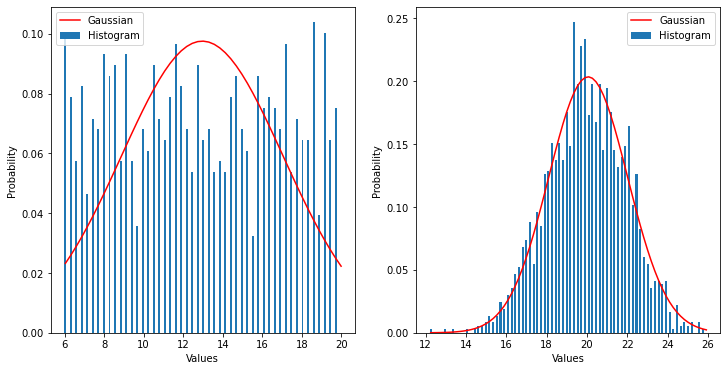

In [16]:
figure , ax = plt.subplots(1,2,figsize=(12,6))

ax[0].bar(bins1[:-1], histogram1, width=0.1, label="Histogram")
ax[0].plot(bins1, normalDistribution1, label="Gaussian", color='red')
ax[0].set(xlabel="Values")
ax[0].set(ylabel="Probability")
ax[0].legend()

ax[1].bar(bins2[:-1], histogram2,width=0.1, label="Histogram")
ax[1].plot(bins2, normalDistribution2, label="Gaussian", color='red')
ax[1].set(xlabel="Values")
ax[1].set(ylabel="Probability")
ax[1].legend()

plt.show()

# If you want we can save the figure to a file
# fig1.savefig("fig.png")

Note how the first set of data were uniformly distributed between 6 and 20, hence the standard deviation is not a measure of the uncertainty of the data. On the other hand, the data in the second set are _normally_ distributed, hence the variance is indeed a measure of the uncertainty.